# [To Do] Project related details

In [44]:
# Import all libraries and dependencies
import pandas as pd
import os
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.figure as figure

from BRICS_Helper import Helper as helper

# This section is to set defualt options for pandas and other libraries

In [8]:
# Set default options for pandas and other libraries
pd.set_option('display.max_colwidth', None)

# This section is to set global variables that will be used throughout the project

In [36]:
start_year = 2010
end_year = 2019

# This section is to define common functions

In [48]:
# Function to return dataframe based on start_year and end_year
def fn_df_year_filter(df, start_year, end_year):
    return df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].reset_index(drop=True)

def fn_df_set_data_types(df):
    return df.astype({'Country_Name': 'string',
                      'Country_Code': 'string',
                      'Series_Name': 'string',
                      'Series_Code': 'string',
                      'Year': 'int'})

# This section is to read the source files and store in corresponding dataframes

In [13]:
# Import Excel files
economy_raw_df = pd.read_excel("Resources/BRICS Economic Data.xlsx", sheet_name="Data")
education_environment_raw_df = pd.read_excel("Resources/BRICS Education and Environment Data.xlsx", sheet_name="Data")
health_poverty_raw_df = pd.read_excel("Resources/BRICS Health and Poverty Data.xlsx", sheet_name="Data")
private_sector_raw_df = pd.read_excel("Resources/BRICS Private Sector Data.xlsx", sheet_name="Data")
public_sector_raw_df = pd.read_excel("Resources/BRICS Public Sector and Society Data.xlsx", sheet_name="Data")

# This section is to study the dataframes and find the usable size of data

In [ ]:
# Study the dataframes and understand the data

df_shapes = {
    'dataframe': ['economy', 'education_environment', 'health_poverty', 'private_sector', 'public_sector'],
    'shape': [economy_raw_df.shape, education_environment_raw_df.shape, health_poverty_raw_df.shape, private_sector_raw_df.shape, public_sector_raw_df.shape],
    'total_nans': [economy_raw_df.isna().sum().sum(), education_environment_raw_df.isna().sum().sum(), health_poverty_raw_df.isna().sum().sum(), private_sector_raw_df.isna().sum().sum(), public_sector_raw_df.isna().sum().sum()]
}

df_shapes = pd.DataFrame(df_shapes)

df_shapes

# test

In [43]:
# Modify the column names (Here we are targeting only the year column). We might need to mofdify more columns in the future
economy_raw_df.columns = helper.year_col_name(economy_raw_df.columns)
education_environment_raw_df.columns = helper.year_col_name(education_environment_raw_df.columns)
health_poverty_raw_df.columns = helper.year_col_name(health_poverty_raw_df.columns)
private_sector_raw_df.columns = helper.year_col_name(private_sector_raw_df.columns)
public_sector_raw_df.columns = helper.year_col_name(public_sector_raw_df.columns)

#

In [16]:
# Using melt function here to unpivot the dataframes
economy_melted_df = economy_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
education_environment_melted_df = education_environment_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
health_poverty_melted_df = health_poverty_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
private_sector_melted_df = private_sector_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
public_sector_melted_df = public_sector_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')

# Preview the dataframes
display(economy_melted_df.head(1))
display(education_environment_melted_df.head(1))
display(health_poverty_melted_df.head(1))
display(private_sector_melted_df.head(1))
display(public_sector_melted_df.head(1))

,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,1970,NaN


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,1970,NaN


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1970,77.1184


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Agricultural raw materials exports (% of merchandise exports),TX.VAL.AGRI.ZS.UN,1970,11.895098


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Adequacy of social insurance programs (% of total welfare of beneficiary households),per_si_allsi.adq_pop_tot,1970,NaN


In [17]:
display(economy_melted_df.isna().sum())
display(education_environment_melted_df.isna().sum())
display(health_poverty_melted_df.isna().sum())
display(private_sector_melted_df.isna().sum())
display(public_sector_melted_df.isna().sum())

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           26532
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           41574
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           38931
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           25106
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           54786
dtype: int64

#

In [49]:
# This section is to modify the data and finalize the dataframes to proceed with our analysis

# Drop all NaN values
economy_modified_df = economy_melted_df.dropna()
education_environment_modified_df = education_environment_melted_df.dropna()
health_poverty_modified_df = health_poverty_melted_df.dropna()
private_sector_modified_df = private_sector_melted_df.dropna()
public_sector_modified_df = public_sector_melted_df.dropna()

# Modify data types for all dataframes
economy_modified_df = fn_df_set_data_types(economy_modified_df)
education_environment_modified_df = fn_df_set_data_types(education_environment_modified_df)
health_poverty_modified_df = fn_df_set_data_types(health_poverty_modified_df)
private_sector_modified_df = fn_df_set_data_types(private_sector_modified_df)
public_sector_modified_df = fn_df_set_data_types(public_sector_modified_df)

In [51]:
# Restrict dataframes last n years of data
economy_final_df = fn_df_year_filter(economy_modified_df, start_year, end_year)
education_environment_final_df = fn_df_year_filter(education_environment_modified_df, start_year, end_year)
health_poverty_final_df = fn_df_year_filter(health_poverty_modified_df, start_year, end_year)
private_sector_final_df = fn_df_year_filter(private_sector_modified_df, start_year, end_year)
public_sector_final_df = fn_df_year_filter(public_sector_modified_df, start_year, end_year)

display(economy_final_df.info())
display(education_environment_final_df.info())
display(health_poverty_final_df.info())
display(private_sector_final_df.info())
display(public_sector_final_df.info())

display(economy_final_df.head(1))
display(education_environment_final_df.head(1))
display(health_poverty_final_df.head(1))
display(private_sector_final_df.head(1))
display(public_sector_final_df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14912 entries, 0 to 14911
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  14912 non-null  string 
 1   Country_Code  14912 non-null  string 
 2   Series_Name   14912 non-null  string 
 3   Series_Code   14912 non-null  string 
 4   Year          14912 non-null  int64  
 5   Value         14912 non-null  float64
dtypes: float64(1), int64(1), string(4)
memory usage: 699.1 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  7299 non-null   string 
 1   Country_Code  7299 non-null   string 
 2   Series_Name   7299 non-null   string 
 3   Series_Code   7299 non-null   string 
 4   Year          7299 non-null   int64  
 5   Value         7299 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 342.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  8805 non-null   string 
 1   Country_Code  8805 non-null   string 
 2   Series_Name   8805 non-null   string 
 3   Series_Code   8805 non-null   string 
 4   Year          8805 non-null   int64  
 5   Value         8805 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 412.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  6234 non-null   string 
 1   Country_Code  6234 non-null   string 
 2   Series_Name   6234 non-null   string 
 3   Series_Code   6234 non-null   string 
 4   Year          6234 non-null   int64  
 5   Value         6234 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 292.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9625 entries, 0 to 9624
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  9625 non-null   string 
 1   Country_Code  9625 non-null   string 
 2   Series_Name   9625 non-null   string 
 3   Series_Code   9625 non-null   string 
 4   Year          9625 non-null   int64  
 5   Value         9625 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 451.3 KB


None

,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,2010,5.155433


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,2010,94.0


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,2010,66.8926


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Agricultural raw materials exports (% of merchandise exports),TX.VAL.AGRI.ZS.UN,2010,3.88294


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2010,1302.474648


# This section is to concat dataframes and create mapping dictionaries

In [52]:
# Concat all dataframes and collect global data

merged_all_df = pd.concat([economy_final_df, education_environment_final_df, health_poverty_final_df, private_sector_final_df, public_sector_final_df])

# Series dictionary to map Series_Code to Series_Name
dict_series = dict(merged_all_df[['Series_Code', 'Series_Name']].drop_duplicates().reset_index(drop=True).values)

# Countries dictionary to map Country_Code to Country_Name
dict_countries = dict(merged_all_df[['Country_Code', 'Country_Name']].drop_duplicates().reset_index(drop=True).values)

# Series used in this project for analysis

## Economy
* NY.ADJ.NNTY.KD.ZG -> Adjusted net national income (annual % growth)

## Health & Poverty

## Private & Public Sectors

## Education & Environment

In [120]:
all_series_correlation = merged_all_df.loc[
                                            (merged_all_df['Series_Code'] == 'SH.XPD.CHEX.GD.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SH.DYN.MORT')\
                                            | (merged_all_df['Series_Code'] == 'SP.DYN.LE00.IN')\
                                            | (merged_all_df['Series_Code'] == 'NE.EXP.GNFS.ZS')\
                                            | (merged_all_df['Series_Code'] == 'TX.VAL.AGRI.ZS.UN')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.RNWX.ZS')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.HYRO.ZS')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.FOSL.ZS')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.ACCS.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SE.ADT.LITR.ZS')\
                                          ]\
                                            .reset_index(drop=True)

all_series_correlation = all_series_correlation.pivot(index=['Country_Code', 'Year'], columns="Series_Code", values="Value")

all_series_correlation = all_series_correlation.reset_index()

all_series_correlation.head()

Series_Code,Country_Code,Year,EG.ELC.ACCS.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.RNWX.ZS,NE.EXP.GNFS.ZS,SE.ADT.LITR.ZS,SH.DYN.MORT,SH.XPD.CHEX.GD.ZS,SP.DYN.LE00.IN,TX.VAL.AGRI.ZS.UN
0,BRA,2010,99.352173,12.385578,78.195426,6.528808,10.865585,90.379181,18.6,7.945160,73.619,3.882940
1,BRA,2011,99.328691,9.829678,80.550515,6.570482,11.582513,91.411240,17.9,7.788195,73.921,3.565907
2,BRA,2012,99.519494,14.598353,75.158155,7.290129,11.877539,91.337852,17.2,7.736377,74.209,3.842070
3,BRA,2013,99.575151,20.546108,68.463446,8.225762,11.742231,91.484238,16.7,7.976600,74.483,3.679592
4,BRA,2014,99.650247,24.253239,63.224984,9.857090,11.011943,91.729431,16.3,8.396446,74.745,4.099105


### Tell the story behind this plot

### Use Case 1

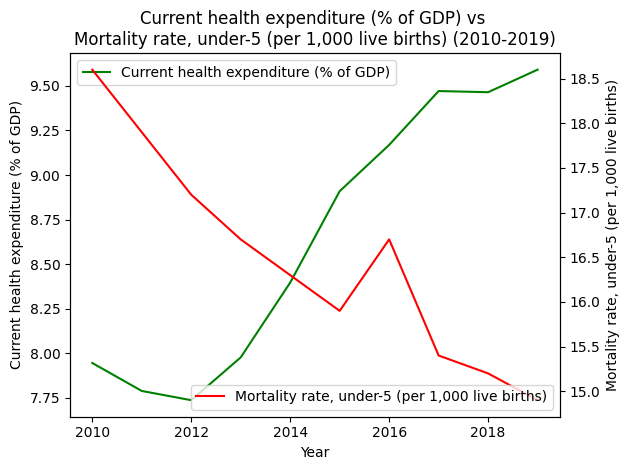

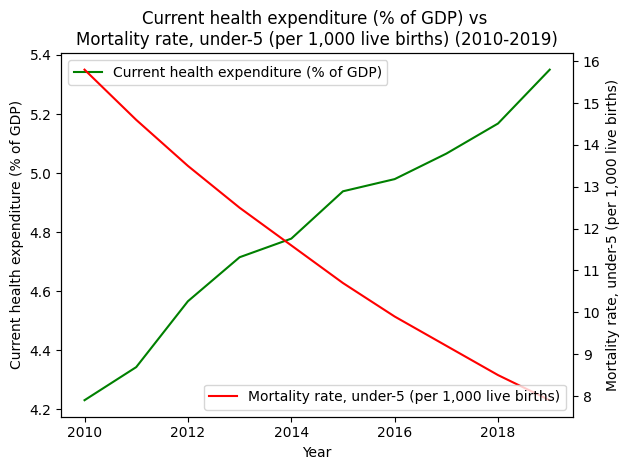

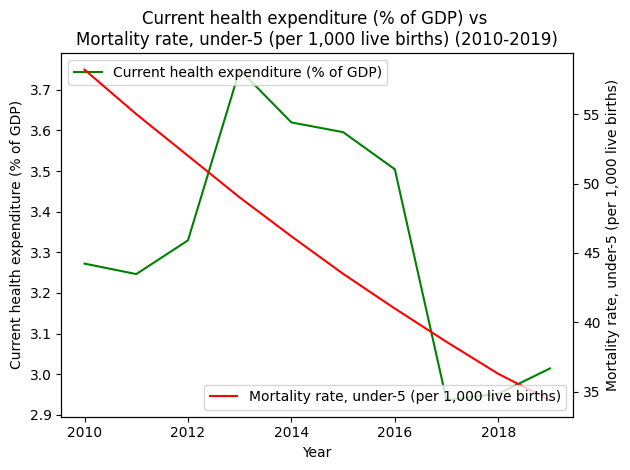

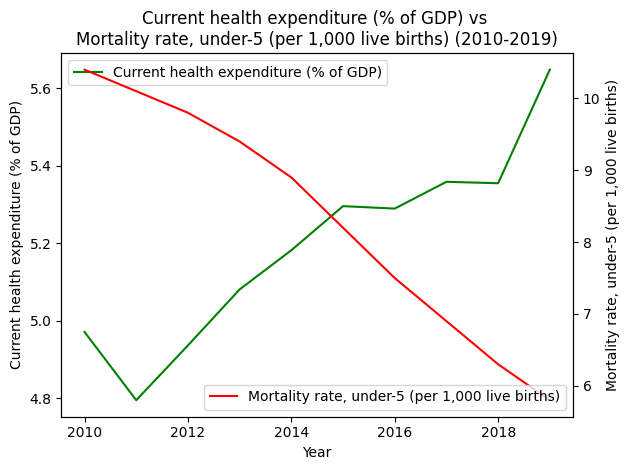

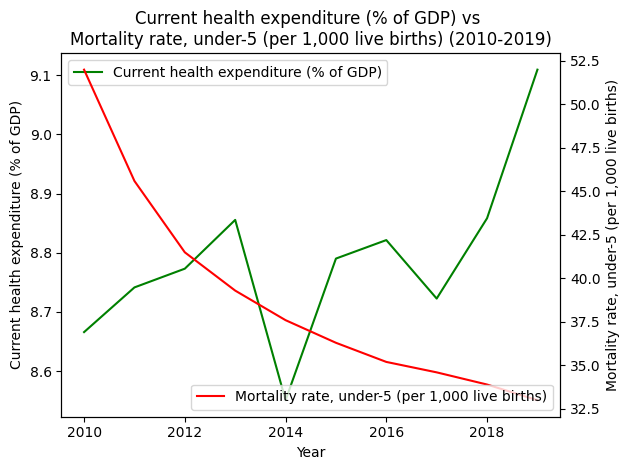

In [130]:
# Current health expenditure (% of GDP) vs Mortality rate, under-5 (per 1,000 live births)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(country_data['Year'], country_data['SH.XPD.CHEX.GD.ZS'], label=f'{dict_series['SH.XPD.CHEX.GD.ZS']}', color='g')
    ax2.plot(country_data['Year'], country_data['SH.DYN.MORT'], label=f'{dict_series['SH.DYN.MORT']}', color='r')

    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['SH.XPD.CHEX.GD.ZS']}')
    ax2.set_ylabel(f'{dict_series['SH.DYN.MORT']}')

    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')

    plt.title(f'{dict_series['SH.XPD.CHEX.GD.ZS']} vs \n{dict_series['SH.DYN.MORT']} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

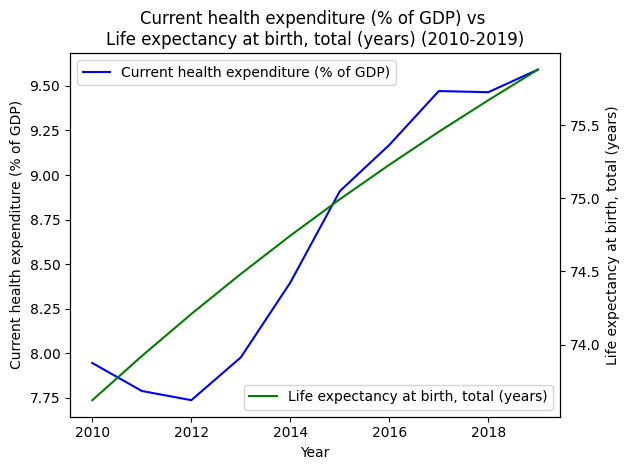

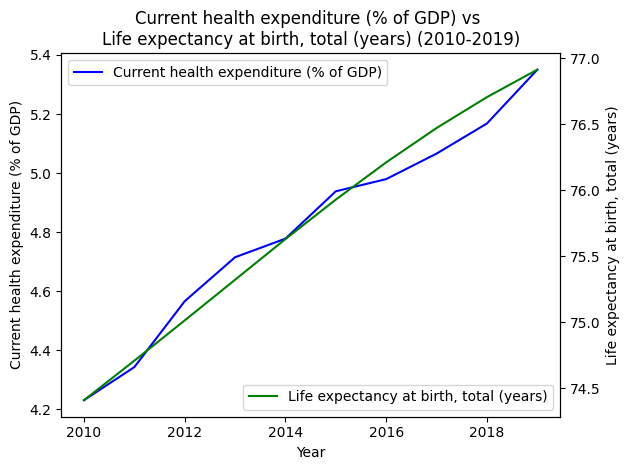

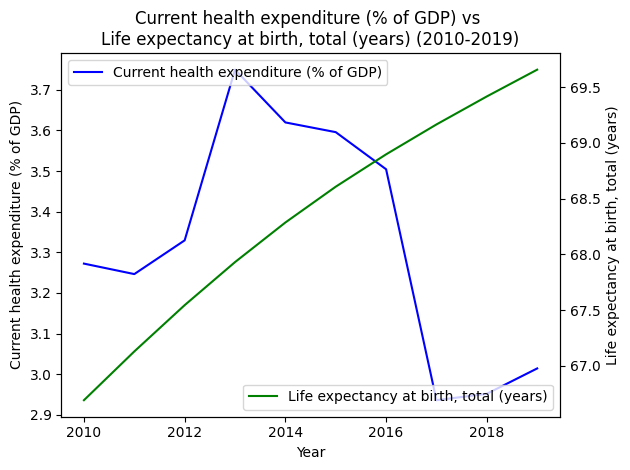

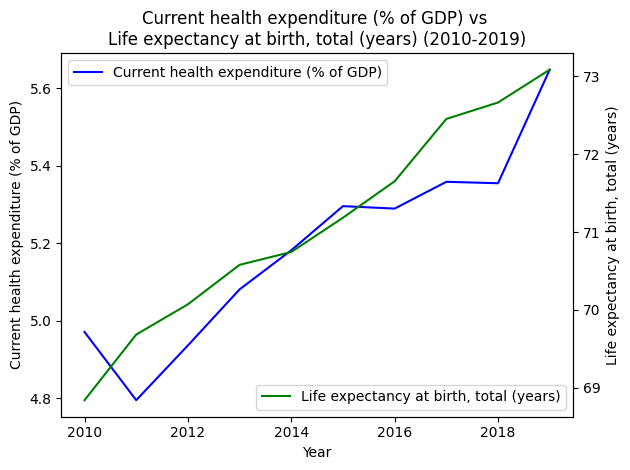

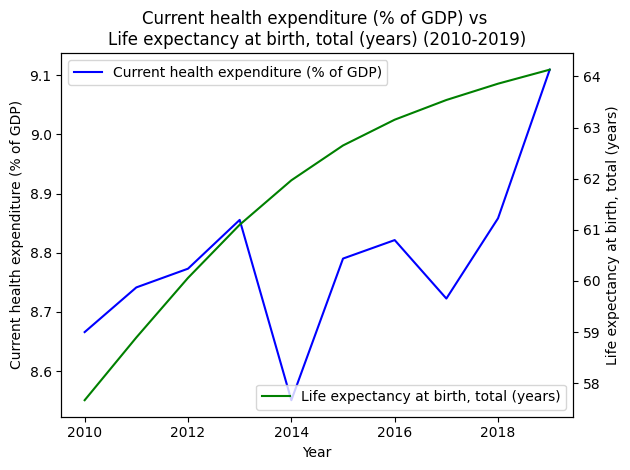

In [131]:
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['SH.XPD.CHEX.GD.ZS'], label=f'{dict_series['SH.XPD.CHEX.GD.ZS']}', color='b')
    ax2.plot(country_data['Year'], country_data['SP.DYN.LE00.IN'], label=f'{dict_series['SP.DYN.LE00.IN']}', color='g')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['SH.XPD.CHEX.GD.ZS']}')
    ax2.set_ylabel(f'{dict_series['SP.DYN.LE00.IN']}')

    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_series['SH.XPD.CHEX.GD.ZS']} vs \n{dict_series['SP.DYN.LE00.IN']} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

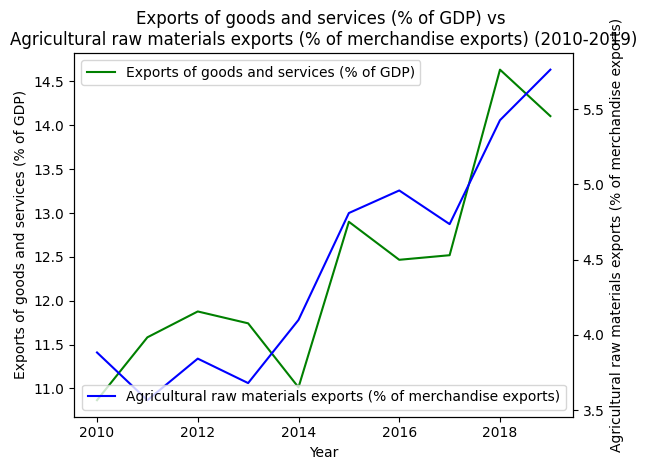

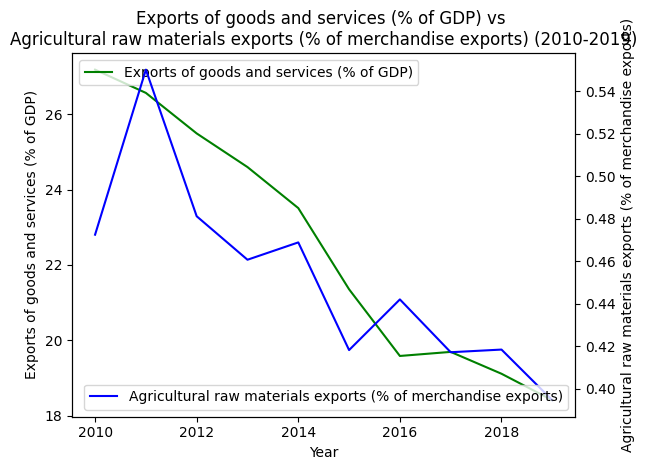

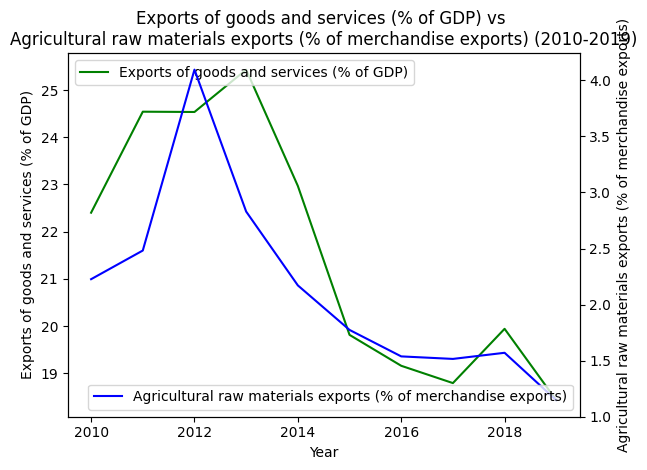

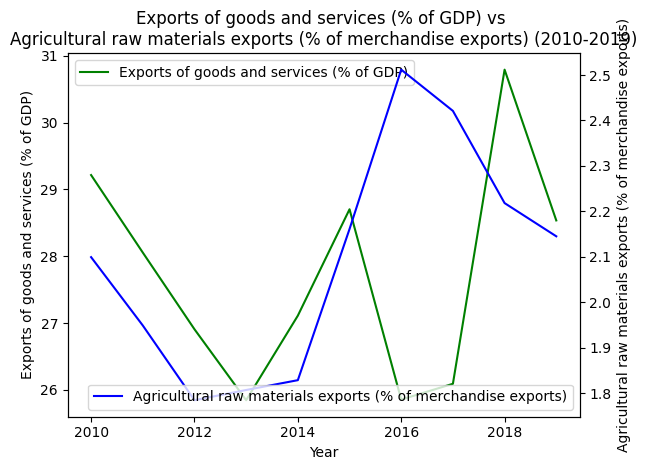

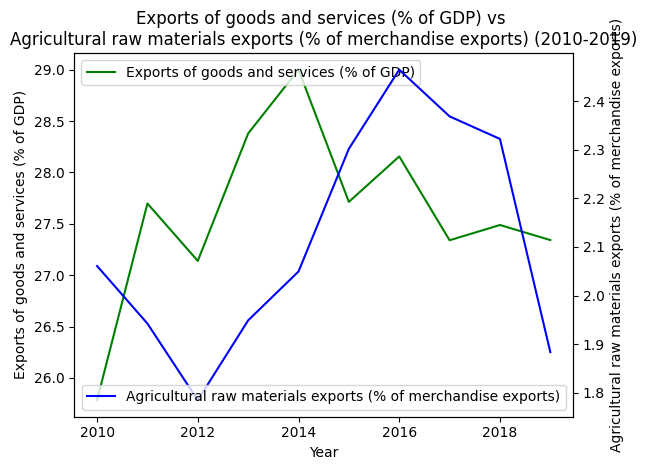

In [135]:
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['NE.EXP.GNFS.ZS'], label=f'{dict_series['NE.EXP.GNFS.ZS']}', color='g')
    ax2.plot(country_data['Year'], country_data['TX.VAL.AGRI.ZS.UN'], label=f'{dict_series['TX.VAL.AGRI.ZS.UN']}', color='b')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['NE.EXP.GNFS.ZS']}')
    ax2.set_ylabel(f'{dict_series['TX.VAL.AGRI.ZS.UN']}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_series['NE.EXP.GNFS.ZS']} vs \n{dict_series['TX.VAL.AGRI.ZS.UN']} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

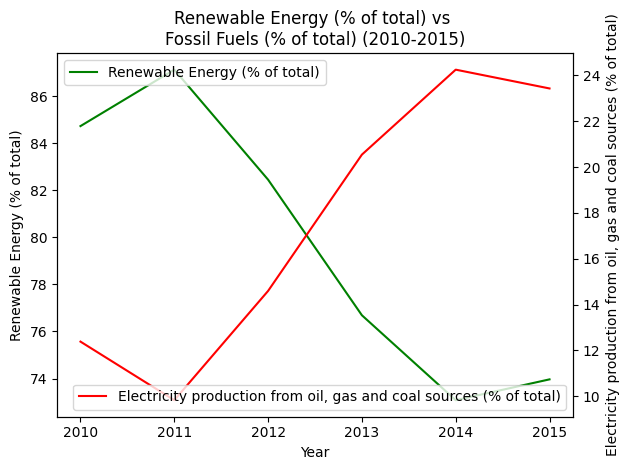

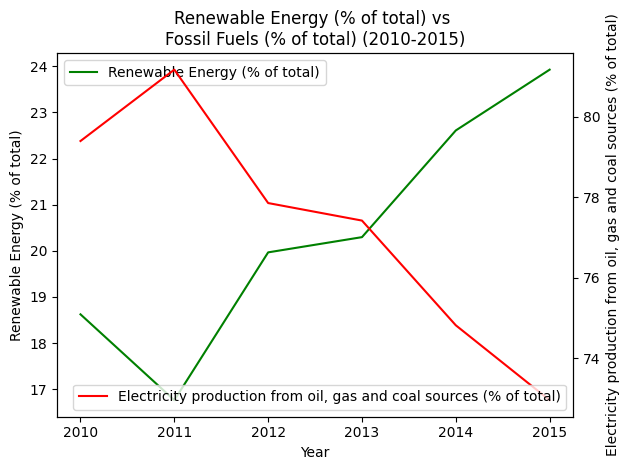

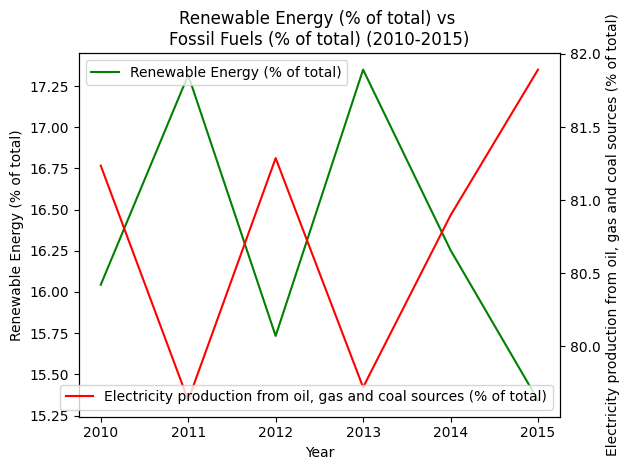

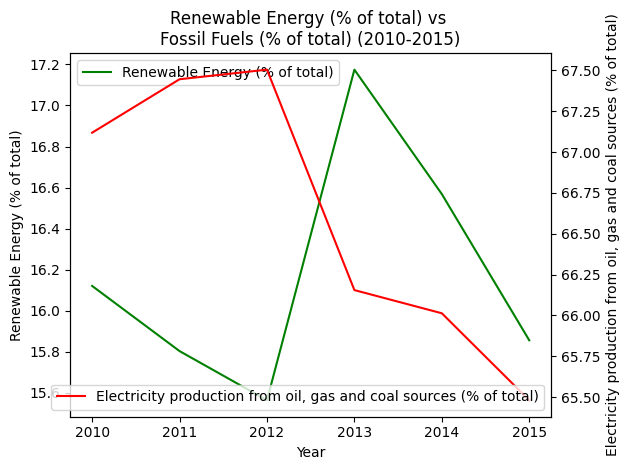

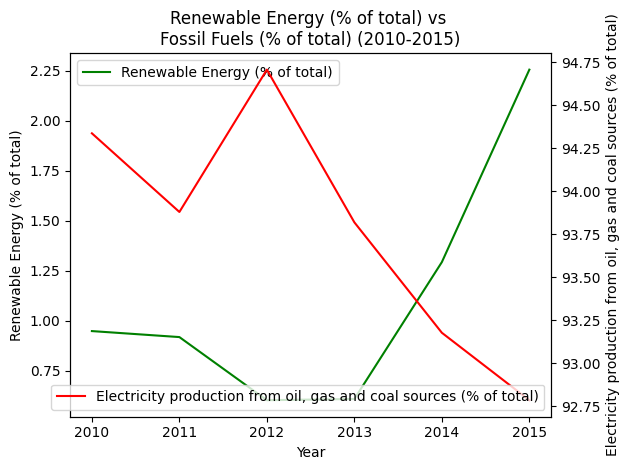

In [136]:
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['EG.ELC.RNWX.ZS'] + country_data['EG.ELC.HYRO.ZS'], label='Renewable Energy (% of total)', color='g')
    ax2.plot(country_data['Year'], country_data['EG.ELC.FOSL.ZS'], label=f'{dict_series['EG.ELC.FOSL.ZS']}', color='r')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Renewable Energy (% of total)')
    ax2.set_ylabel(f'{dict_series['EG.ELC.FOSL.ZS']}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'Renewable Energy (% of total) vs \nFossil Fuels (% of total) ({start_year}-2015)')

    plt.tight_layout()
    
    plt.show()

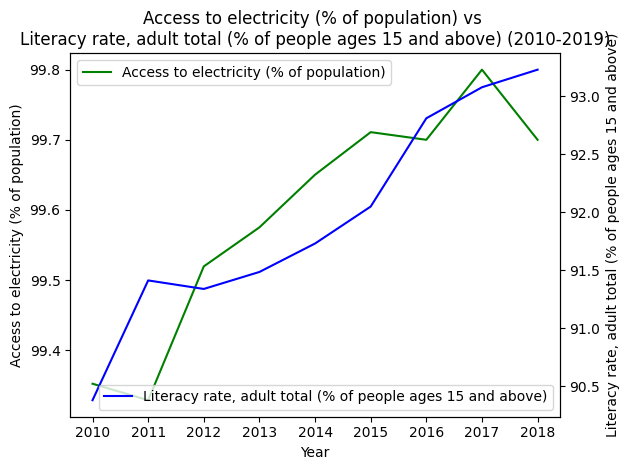

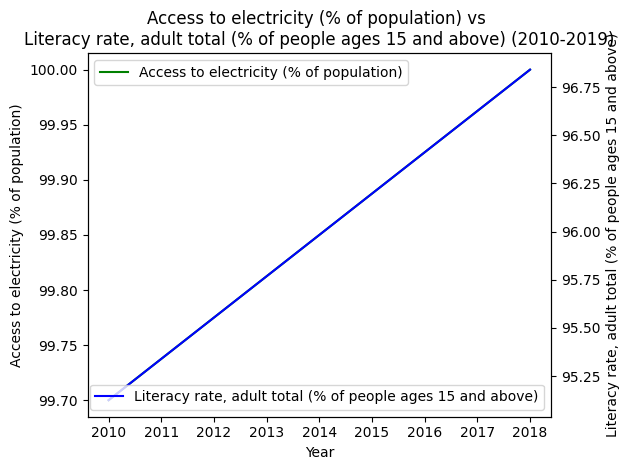

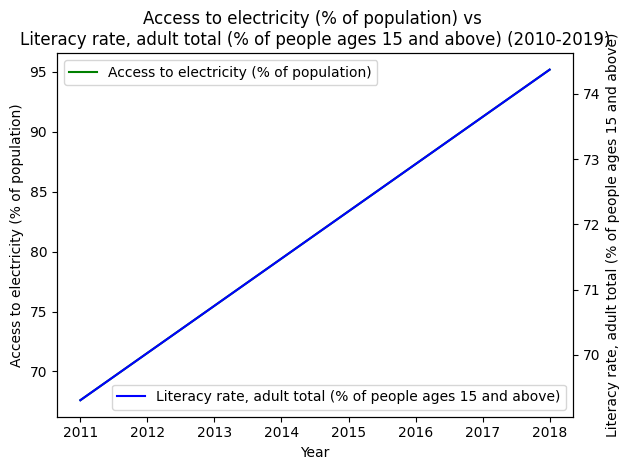

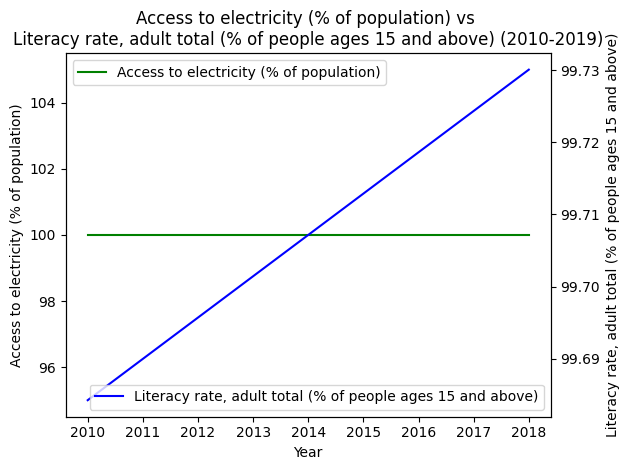

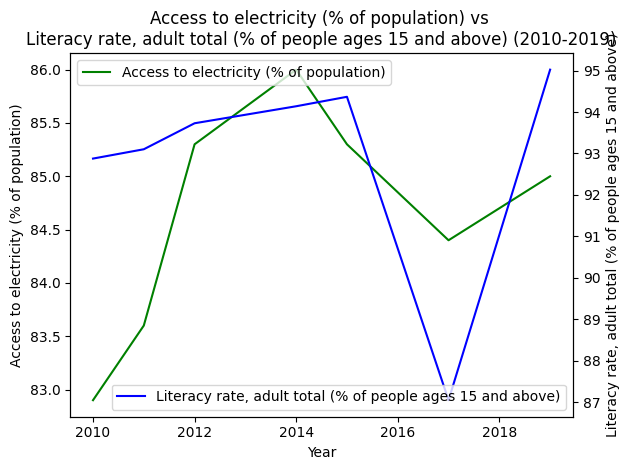

In [137]:
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country][['Year', 'EG.ELC.ACCS.ZS', 'SE.ADT.LITR.ZS']].dropna()
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['EG.ELC.ACCS.ZS'], label=f'{dict_series['EG.ELC.ACCS.ZS']}', color='g')
    ax2.plot(country_data['Year'], country_data['SE.ADT.LITR.ZS'], label=f'{dict_series['SE.ADT.LITR.ZS']}', color='b')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['EG.ELC.ACCS.ZS']}')
    ax2.set_ylabel(f'{dict_series['SE.ADT.LITR.ZS']}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_series['EG.ELC.ACCS.ZS']} vs \n{dict_series['SE.ADT.LITR.ZS']} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()